# UAC20 Audio Class Device Topology Plotting - find and plot all

In [16]:
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


In [17]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..', 'codes')))

path = os.sep.join(['..', '..', '..', '..', '..', '待處理', 'Universal Serial Bus', 'bitbucket', 'github', 'codes'])
sys.path.append(path) 

path = os.sep.join(['..', '..', '..', '..', '..', '待處理', 'ORM', 'bitbucket', 'github', 'codes'])
sys.path.append(path)

## Find all audio devices

In [33]:
import usb.core

def find_class(class_code = 0x01): 
    def scan(device):
        if device.bDeviceClass == class_code:
            return True
            
        for cfg in device:
            for inft in cfg:
                if inft.bInterfaceClass == class_code: 
                    return True
        return False
    return scan
    
audio_devices = list(usb.core.find(find_all = True, custom_match = find_class(0x01)))
audio_devices = sorted(set([(audio_device.idVendor, audio_device.idProduct) for audio_device in audio_devices]))
audio_devices

[(6975, 8200)]

## Plot Topolographs

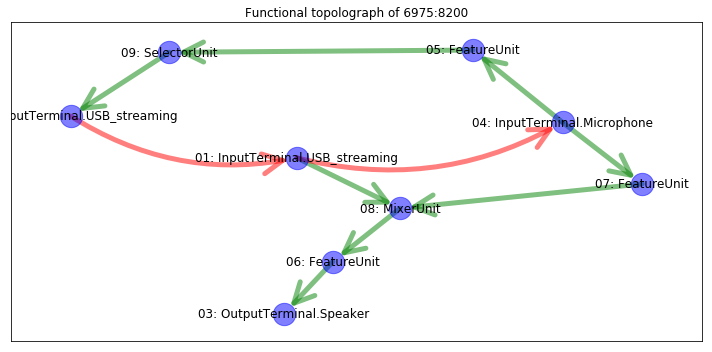

In [34]:
from usb_audio.orm import uac20 

def plot_topolographs(devices):

    def plot_topolograph(idVendor, idProduct):
        ax = plt.gca()

        dev = uac20.UACdevice(vid = idVendor, pid = idProduct) 

        title = 'Functional topolograph of {}:{}'.format(idVendor, idProduct) 
        ax.set_title(title, fontsize = 12)

        dev.draw_topolograph(node_size = 500, label_font_size = 12,
                             edge_width = 5, edge_arrowstyle = '->', edge_arrowsize = 50)
        dev.reset()
    
    n = len(devices)
    fig, axs = plt.subplots(n, 1, figsize = (10, 5*n))
    
    for device in devices:
        plot_topolograph(*device)

plot_topolographs(audio_devices)
plt.tight_layout()